In this assignment you will work with restricted Boltzmann machines. Always show how you arrived at your answer. Hand in your assignment by adding the solutions to this notebook file.

<H3>Exercise 1 (2 points)</H3>

Consider the free energy for the RBM:
$$
F(\mathbf{v}) = -\mathbf{b}^T\mathbf{v} - \sum_i \log(1 + \exp(c_i + \mathbf{w}_i^T\mathbf{v}))\,.
$$
Derive $\frac{\partial F}{\partial b_j}$, $\frac{\partial F}{\partial c_i}$ and $\frac{\partial F}{\partial w_{ij}}$. Show how you arrive at your answer.

<H3>Exercise 1 solutions</H3>


 $\frac{\partial F}{\partial b_j} = \frac{\partial -\mathbf{b}^T\mathbf{v} - \sum_i \log(1 + \exp(c_i + \mathbf{w}_i^T\mathbf{v}))}{\partial b_j} $ treat the term $ \sum_i \log(1 + \exp(c_i + \mathbf{w}_i^T\mathbf{v}))$ as a constant and ignore it gives $\frac{\partial -\mathbf{b}^T\mathbf{v}}{\partial b_j} = \frac{\partial -(b_1 v_1 + ... + b_j v_j + ... + b_n v_n)}{\partial b_j} = -v_j$
 
$ \frac{\partial F}{\partial c_j} = \frac{\partial -\mathbf{b}^T\mathbf{v} - \sum_i \log(1 + \exp(c_i + \mathbf{w}_i^T\mathbf{v}))}{\partial c_j} = \frac{\partial \log(1 + \exp(c_i + \mathbf{w}_i^T\mathbf{v}))}{\partial c_j} = \frac{\partial \log(x)}{\partial x} \frac{\partial 1 + \exp(c_i + \mathbf{w}_i^T\mathbf{v})}{c_i} = \frac{1}{x} exp(c_i + w_i^T v) = - \frac{exp(c_i + w_i^T v)}{1 + exp(c_i + w^t_i v)}$ which is of the same form as $- sigmoid (c_i + w^t_i v)$ and according to "A Practical Guide to Training Restricted Boltzmann
Machines" page 4, this is the definition of the probability $-p(h_i = 1 | v)$.

$\frac{\partial F}{\partial w_{ij}} = \frac{\partial -\mathbf{b}^T\mathbf{v} - \sum_i \log(1 + \exp(c_i + \mathbf{w}_i^T\mathbf{v}))}{\partial w_{ij}} = \frac{\partial \log(1 + \exp(c_i + \mathbf{w}_i^T\mathbf{v}))}{\partial w_{ij}} = \frac{\partial \log(x)}{\partial x} \frac{\partial 1 + \exp(c_i + \mathbf{w}_i^T\mathbf{v})}{w_{ij}} = \frac{1}{x} exp(c_i + w_i^T v) = - \frac{exp(c_i + w_i^T v)}{1 + exp(c_i + w^t_i v)}$ which is again of the same form as $-sigmoid (c_i + w^t_i v)$ except now the term $w^t_i$ is not treated as a constant so the multiplication with $v$ matters and this is the definition of the probability $-p(h_i = 1 | v)v_j$.

<H3>Exercise 2 (8 points)</H3>

Restricted Boltzmann machines (RBMs) form the basis for deep belief networks. In this practical exercise you will implement the RBM yourself.

We included a dataset digits.mat. This contains a subset of the MNIST digit dataset, discretized to binary values. It contains 10000 digits of size 28 x 28.

In [4]:
import scipy.io
mat = scipy.io.loadmat('digits.mat')
    
X = mat['digits'].astype('float32')

Implement the learning algorithm for restricted Boltzmann machines. Try to keep the algorithm as simple as possible (i.e., don’t implement all the various tricks mentioned in the paper). Use *RBM_train* as a starting point. Apply the RBM learning algorithm to the digits dataset.

In [2]:
import numpy as np

def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def RBM_train(X,N=10,T=10):
    # RBM_TRAIN trains a restricted Boltzmann machine on M x nexamples input
    # data X with N hidden units for T time steps.
    #
    # Returns N x M weights W, M x 1 visible unit bias b and N x 1 hidden unit bias c

    M = X.shape[0]
    W = 10**-1*np.random.normal(size=[N,M])
    b = 10**-1*np.random.normal(size=M)
    c = np.zeros(N)
    
    # iterate over examples (iterating over minibatches would be more elegant!)
    for idx in range(T):

        prm = np.random.permutation(X.shape[1])
        for i in prm:
            
            # Implementation of the CD-1 algorithm
            ph0 = sigmoid(c + np.dot(W, X[:,i]))
            h_0 = []
            for p in ph0:
                h_0.append(np.random.rand() < p)
                
            pv1 = sigmoid(b + np.dot(h_0, W))
            
            v_1 = []
            for p in pv1:
                v_1.append(np.random.rand() < p)
                
            ph1 = sigmoid(c + np.dot(W, v_1))
            
            deltaW = np.outer(ph0, X[:,1]) - np.outer(ph1,v_1)  
            
            deltab = X[:,i] - v_1
            
            deltac = ph0 - ph1
            
            W += deltaW
            b += deltab
            c += deltac
            

    return W,b,c

C:\Users\Lima\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: overflow encountered in exp


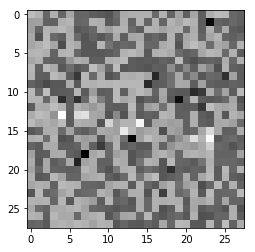

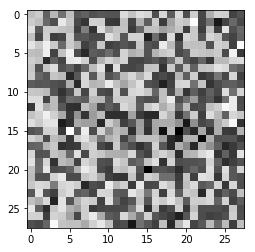

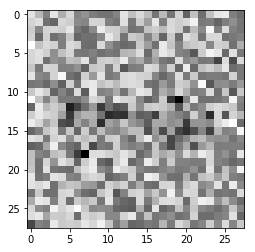

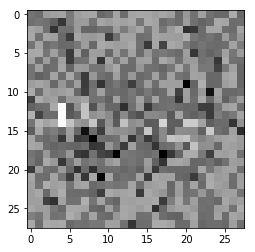

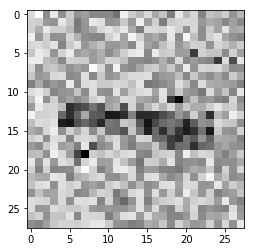

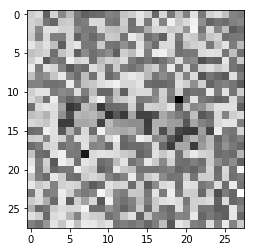

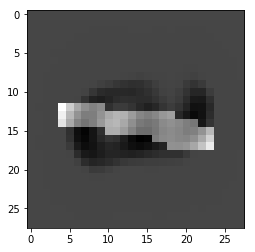

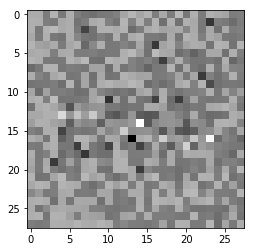

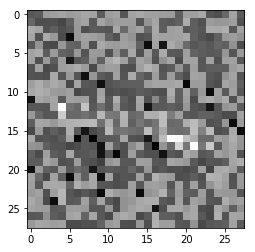

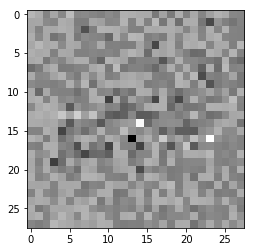

In [5]:
W, b, c = RBM_train(X)

import matplotlib.pyplot as plt

for i in range(10):
    plt.imshow(np.reshape(W[i], [28,28]), cmap = 'gray')
    plt.show()



Plot the rows of W as receptive fields.

You will now generate fantasies. RBMs are so-called generative models. This means that they can be used to generate visible states. This can be done by running Gibbs sampling for T≫1 steps (instead of just one step in CD-1) from a random initial state of the hidden units. Implement a function *RBM_test(W, b, c, T)* which implements this procedure and visualizes the state of the visible units during Gibbs sampling. Add five different fantasies to your pdf. Reflect on the generated fantasies and how this relates to the learnt parameters.